# Homework 4

Name: Kavana Manvi Krishnamuthy

ID: 2158984

## Part 1 – Edge Detection

In [4]:
import cv2
import matplotlib.pyplot as plt
print(cv2.__version__)

4.10.0


In [5]:
image1 = cv2.imread("/Users/kavanamanvi/Desktop/IIP/HW4/Image1.jpeg")
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
# Display the image
plt.imshow(image1_rgb)

Source- Picture taken by me near the bus stop outside my gym near Clark&Diversey 

In [7]:
#convert to gray scale
if len(image1_rgb.shape) == 3:
    image1_grey = cv2.cvtColor(image1_rgb, cv2.COLOR_BGR2GRAY)
else:
    image1_grey = image1

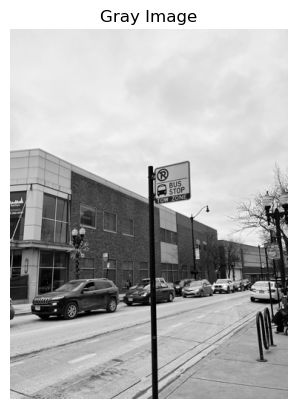

In [8]:
plt.imshow(image1_grey,cmap='gray')
plt.axis('off')
plt.title('Gray Image')
plt.show()

### I. Roberts

In [10]:
import cv2
import numpy as np

In [11]:
r_x_kernel = np.array([[1, 0], [0, -1]])
r_y_kernel = np.array([[0, 1], [-1, 0]])
edge_x = cv2.filter2D(image1_grey, -1, r_x_kernel)
edge_y = cv2.filter2D(image1_grey, -1, r_y_kernel)
roberts_result = np.sqrt(edge_x**2 + edge_y**2).astype(np.uint8)

### II. Canny

In [13]:
canny_result = cv2.Canny(image1_grey, threshold1=150, threshold2=150)

Parameters considered: [0,25,50,75,100,12..255]
I tried several parameters for threshold1 and threshold 2 while 25 had way too many edges which were unecessary, while 255 had way ew edges. The middle ground 150 was the most suitable.

### III. Sobel

In [16]:
sobel_x_value = cv2.Sobel(image1_grey, cv2.CV_64F, 1, 0, ksize=3)
sobel_y_value = cv2.Sobel(image1_grey, cv2.CV_64F, 0, 1, ksize=3)
sobel_result = np.sqrt(sobel_x_value**2 + sobel_y_value**2).astype(np.uint8)

### IV. Prewitt

In [18]:
p_x_kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
p_y_kernel = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

In [19]:
prewitt_x_edges = cv2.filter2D(image1_grey, -1, p_x_kernel)
prewitt_y_edges = cv2.filter2D(image1_grey, -1, p_y_kernel)
prewitt_result = np.sqrt(prewitt_x_edges**2 + prewitt_y_edges**2).astype(np.uint8)

In [20]:
# Display images using Matplotlib subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Original Image
axes[0, 0].imshow(image1_grey, cmap='gray')
axes[0, 0].set_title("Original")
axes[0, 0].axis("off")

# Roberts Edge Detection
axes[0, 1].imshow(roberts_result, cmap='gray')
axes[0, 1].set_title("Roberts")
axes[0, 1].axis("off")

# Canny Edge Detection
axes[0, 2].imshow(canny_result, cmap='gray')
axes[0, 2].set_title("Canny")
axes[0, 2].axis("off")

# Sobel Edge Detection
axes[1, 0].imshow(sobel_result, cmap='gray')
axes[1, 0].set_title("Sobel")
axes[1, 0].axis("off")

# Prewitt Edge Detection
axes[1, 1].imshow(prewitt_result, cmap='gray')
axes[1, 1].set_title("Prewitt")
axes[1, 1].axis("off")

# Hide last subplot
axes[1, 2].axis("off")

plt.tight_layout()
plt.show()

Canny straight-up wins here—its edges are super clean, well-defined, and way less noisy than the others. Unlike Roberts, which is kinda messy, or Sobel and Prewitt, which pick up too much texture noise, Canny smooths the image first (thanks to Gaussian blur) and then locks in the most important edges with double thresholding. That means you get solid edge detection without losing key details or dealing with a bunch of random pixel noise. It’s just the best balance of precision and clarity.

## Part 2 – Edge Filter

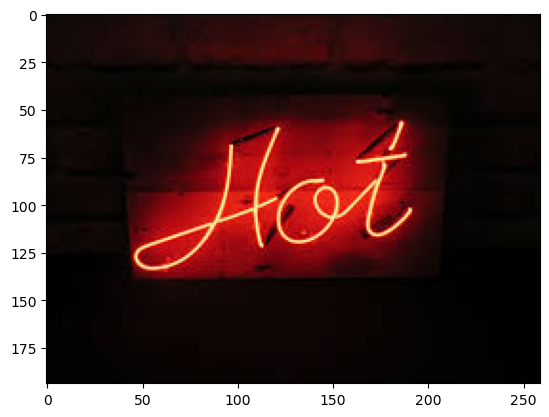

In [23]:
image2 = cv2.imread("/Users/kavanamanvi/Desktop/IIP/HW4/Image2.jpg")
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
# Display the image
plt.imshow(image2_rgb)

Souce: Random picture from the internet

In [25]:
#convert to gray scale
if len(image2_rgb.shape) == 3:
    image2_grey = cv2.cvtColor(image2_rgb, cv2.COLOR_BGR2GRAY)
else:
    image2_grey = image2

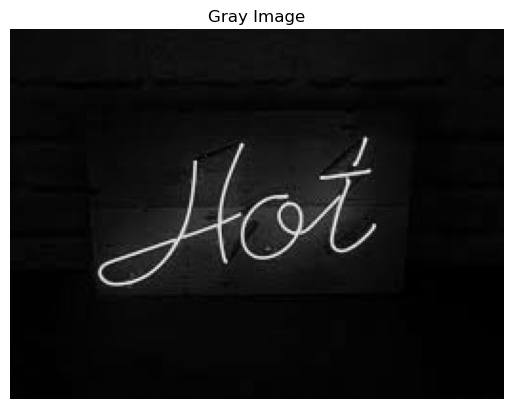

In [26]:
plt.imshow(image2_grey,cmap='gray')
plt.axis('off')
plt.title('Gray Image')
plt.show()

In [27]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [28]:
def sobel_gaussian_derivative(size, sigma, direction='x'):
    center = size // 2
    kernel = np.zeros((size,size), dtype= np.float32)
    for x in range(size):
        for y in range(size):
            x_dist = x - center
            y_dist = y - center
            if direction=='x':
                g_dist = x_dist
            elif direction == 'y':
                g_dist=y_dist
            gaussian_val = -(g_dist)* np.exp(-(x_dist**2 + y_dist**2)/(2* sigma**2))
            kernel[x,y]=gaussian_val/(2* np.pi*sigma **2)
    
    return kernel

In [29]:
sigma = 1
sobel_x = sobel_gaussian_derivative(7, sigma, 'x')
sobel_y = sobel_gaussian_derivative(7, sigma, 'y')

In [30]:
image_path = "/Users/kavanamanvi/Desktop/IIP/HW4/Image2.jpg"
image2_grey = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

gd_sobel_filtered_x = cv2.filter2D(image2_grey, -1, sobel_x)
gd_sobel_filtered_y = cv2.filter2D(image2_grey, -1, sobel_y)
gd_sobel_filtered_xy = np.sqrt(gd_sobel_filtered_x**2 + gd_sobel_filtered_y**2)

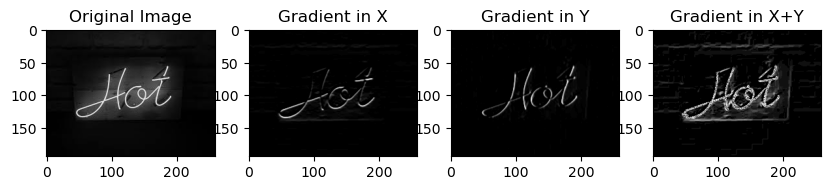

In [31]:
# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 4, 1); plt.title("Original Image"); plt.imshow(image2_grey, cmap='gray')
plt.subplot(1, 4, 2); plt.title("Gradient in X"); plt.imshow(gd_sobel_filtered_x, cmap='gray')
plt.subplot(1, 4, 3); plt.title("Gradient in Y"); plt.imshow(gd_sobel_filtered_y, cmap='gray')
plt.subplot(1, 4, 4); plt.title("Gradient in X+Y"); plt.imshow(gd_sobel_filtered_xy, cmap='gray')
plt.show()

Previous sobel method was used for edge detection.The 7x7 Sobel-like filter differs from the traditional 3x3 Sobel filter in size, formulation, and flexibility. It incorporates Gaussian derivatives, modeling the gradient in one direction and the Gaussian in the perpendicular direction, allowing for smoother gradient estimates and better noise suppression. With an adjustable sigma (σ), it provides greater control over edge detection scale, unlike the fixed-coefficient Sobel filter. Rooted in scale-space theory, it offers a more theoretically grounded approach but comes at the cost of increased computational complexity.

For neon sign images, the gradient in the x-direction captures vertical edges, while the y-direction highlights horizontal glow variations, enhancing the glowing contours.

## Part 3 – Histogram-based Segmentation

In [34]:
image3_grey = cv2.imread("/Users/kavanamanvi/Desktop/IIP/HW4/Image3.jpeg")
# Display the image
plt.imshow(image3_grey,cmap='gray')
plt.axis('off')
plt.title('Gray Image')
plt.show()

Source- Random picture from the internet.

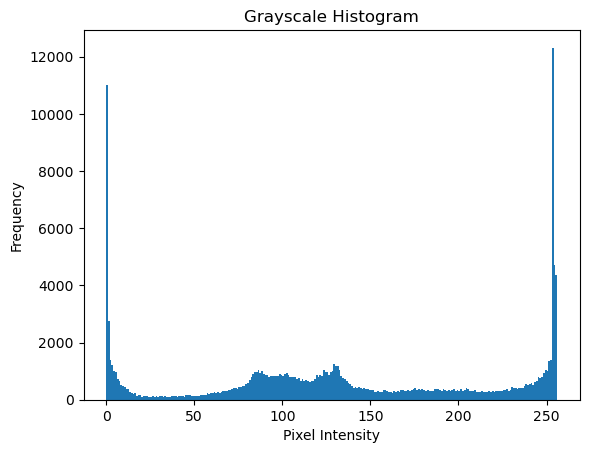

In [36]:
# Compute histogram
hist = cv2.calcHist([image3_grey], [0], None, [256], [0, 256])

# Display histogram
plt.figure()
plt.hist(image3_grey.ravel(),bins=256,range=[0,256])
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

In [37]:
image_path = "/Users/kavanamanvi/Desktop/IIP/HW4/Image3.jpeg"
image3_grey = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [38]:
ranges=[(0,80),(81,150),(151,255)]

bin_imgs = []
for r in ranges:
    bin_img = cv2.inRange(image3_grey, r[0], r[1])
    bin_imgs. append (bin_img)

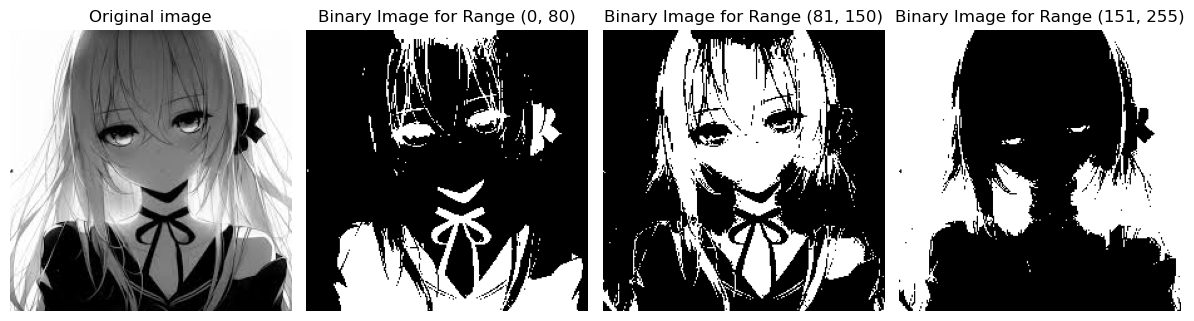

In [39]:
plt. figure(figsize=(12, 8))
plt. subplot (1, 4, 1)
plt. imshow(image3_grey, cmap='gray')
plt.title('Original image')
plt. axis( 'off')
for i, bin_img in enumerate (bin_imgs) :
    plt. subplot (1, 4, i + 2)
    plt. imshow(bin_img, cmap='gray')
    plt.title(f'Binary Image for Range {ranges[i]}')
    plt. axis( 'off')
plt. tight_layout()
plt. show()

The reason for choosing the ranges:

Low intensity range (0-80): This range corresponds to dark areas in the image, such as shadows or dark objects- shirt, choker necklace hairbow, eyeliner, eyebrow.

Mid intensity range (81-150): This range represents mid-tones in the image, which includes - most of all skin, eye ball and hair.

High intensity range (151-255): This range corresponds to bright areas in the image, such as highlights or light-colored areas- like highlights in hair and the background and some area of eyes.

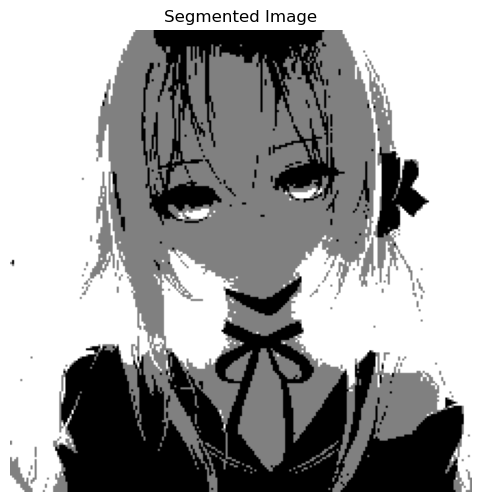

In [41]:
# Combine 
segmented_image = np.zeros_like(image3_grey)
for i, bin_img in enumerate (bin_imgs) :
    segmented_image[bin_img > 0] = i * (255 // len (bin_imgs))
plt.figure(figsize=(6, 6))
plt. imshow (segmented_image, cmap='gray')
plt. title( 'Segmented Image')
plt. axis('off')
plt. show ()

## Part 4 – Noise Reduction

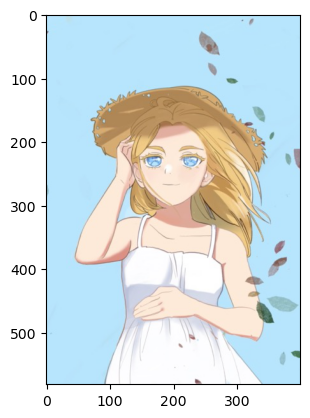

In [43]:
image4 = cv2.imread("/Users/kavanamanvi/Desktop/IIP/HW4/Image4.jpg")
image4_rgb = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)
# Display the image
plt.imshow(image4_rgb)

In [44]:
#convert to gray scale
if len(image4_rgb.shape) == 3:
    image4_grey = cv2.cvtColor(image4_rgb, cv2.COLOR_BGR2GRAY)
else:
    image4_grey = image4

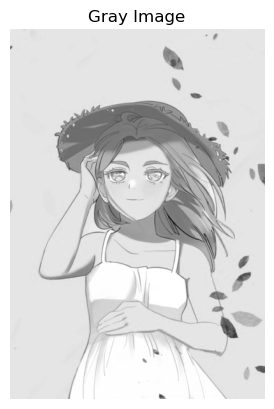

In [45]:
# Display the image
plt.imshow(image4_grey,cmap='gray')
plt.axis('off')
plt.title('Gray Image')
plt.show()

In [46]:
def generate_gaussian_noise(image, mean=0, std_dev=25):
    gaussian_noise = np.random.normal(mean, std_dev, image.shape).astype(np.float32)
    gauss_noise_image = image.astype(np.float32) + gaussian_noise
    gauss_noise_image = np.clip(gauss_noise_image, 0, 255).astype(np.uint8)
    return gauss_noise_image

In [47]:
mean = 0
std_dev = 25 
gaussian_noisy_image = generate_gaussian_noise(image4_grey, mean, std_dev)

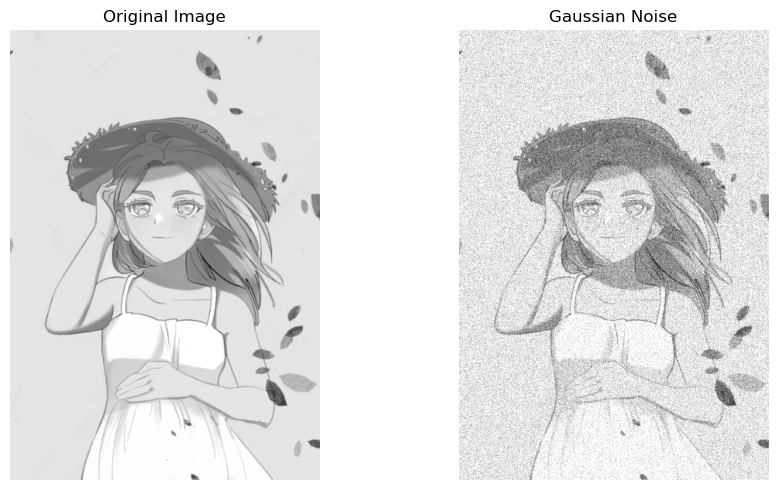

In [48]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image4_grey, cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(gaussian_noisy_image, cmap='gray')
plt.axis('off')
plt.title('Gaussian Noise')
plt.tight_layout()
plt.show()

In [49]:
def generate_salt_and_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02):
    snp_noisy_image = np.copy(image)
    saltMask = np.random.random(image.shape) < salt_prob
    snp_noisy_image[saltMask] = 255

    pepperMask = np.random.random(image.shape) < pepper_prob
    snp_noisy_image[pepperMask] = 0
    
    return snp_noisy_image

In [50]:
salt_prob = 0.02
pepper_prob = 0.02
snp_noisy_image = generate_salt_and_pepper_noise(image4_grey, salt_prob, pepper_prob)

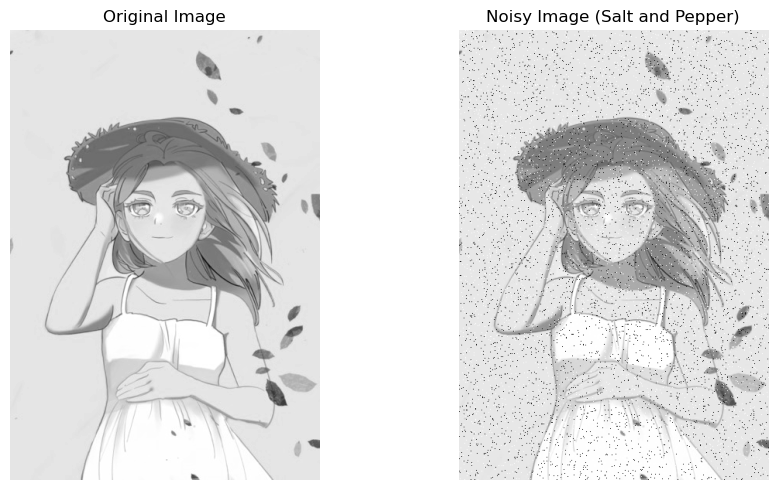

In [51]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image4_grey, cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(snp_noisy_image, cmap='gray')
plt.axis('off')
plt.title('Noisy Image (Salt and Pepper)')
plt.tight_layout()
plt.show()

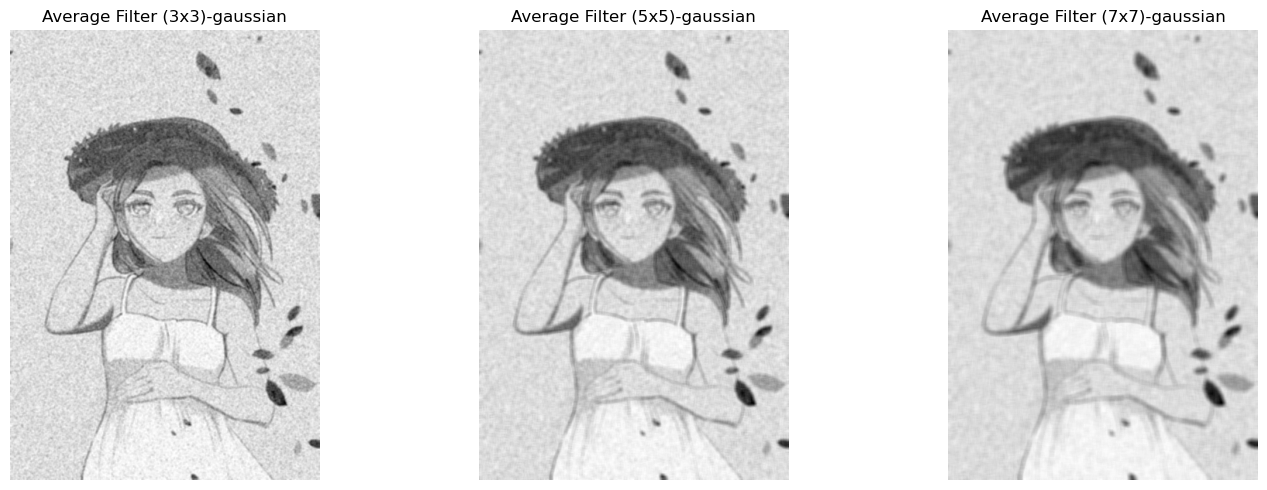

In [52]:
gaussian_avg3x3 = cv2.blur(gaussian_noisy_image, (3,3))
gaussian_avg5x5 = cv2.blur(gaussian_noisy_image, (5,5))
gaussian_avg7x7 = cv2.blur(gaussian_noisy_image, (7,7))

# Display the images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(gaussian_avg3x3, cmap='gray')
plt.axis('off')
plt.title("Average Filter (3x3)-gaussian")
plt.subplot(1, 3, 2)
plt.imshow(gaussian_avg5x5, cmap='gray')
plt.axis('off')
plt.title("Average Filter (5x5)-gaussian")
plt.subplot(1, 3, 3)
plt.imshow(gaussian_avg7x7, cmap='gray')
plt.axis('off')
plt.title("Average Filter (7x7)-gaussian")
plt.tight_layout()
plt.show()


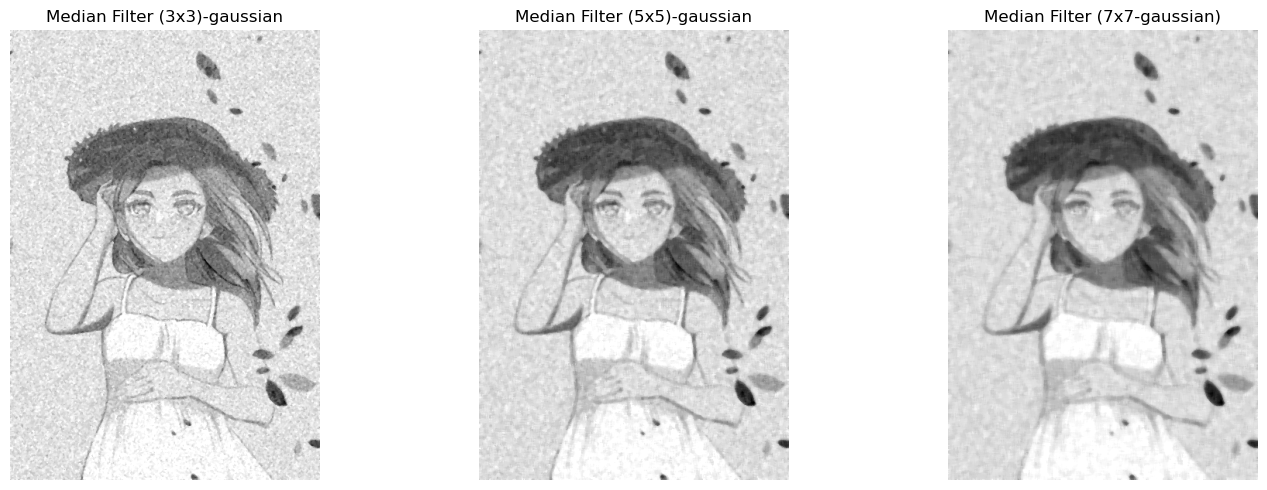

In [53]:
gaussian_median3x3 = cv2.medianBlur(gaussian_noisy_image, 3)
gaussian_median5x5 = cv2.medianBlur(gaussian_noisy_image, 5)
gaussian_median7x7 = cv2.medianBlur(gaussian_noisy_image, 7)

# Display the images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(gaussian_median3x3, cmap='gray')
plt.axis('off')
plt.title("Median Filter (3x3)-gaussian")
plt.subplot(1, 3, 2)
plt.imshow(gaussian_median5x5, cmap='gray')
plt.axis('off')
plt.title("Median Filter (5x5)-gaussian")
plt.subplot(1, 3, 3)
plt.imshow(gaussian_median7x7, cmap='gray')
plt.axis('off')
plt.title("Median Filter (7x7-gaussian)")
plt.tight_layout()
plt.show()


For Gaussian noise, the average filter is the lesser evil compared to the median filter. It smooths out noise while keeping the image quality decent, whereas the median filter is better for spiky noise like salt and pepper. Since Gaussian noise is, well, Gaussian, averaging works better because it maintains the noise’s statistical properties instead of messing with them like a median filter would. That said, neither is great—Gaussian blur (a fancy average filter) works best, but if the noise is too intense, both filters kinda struggle.

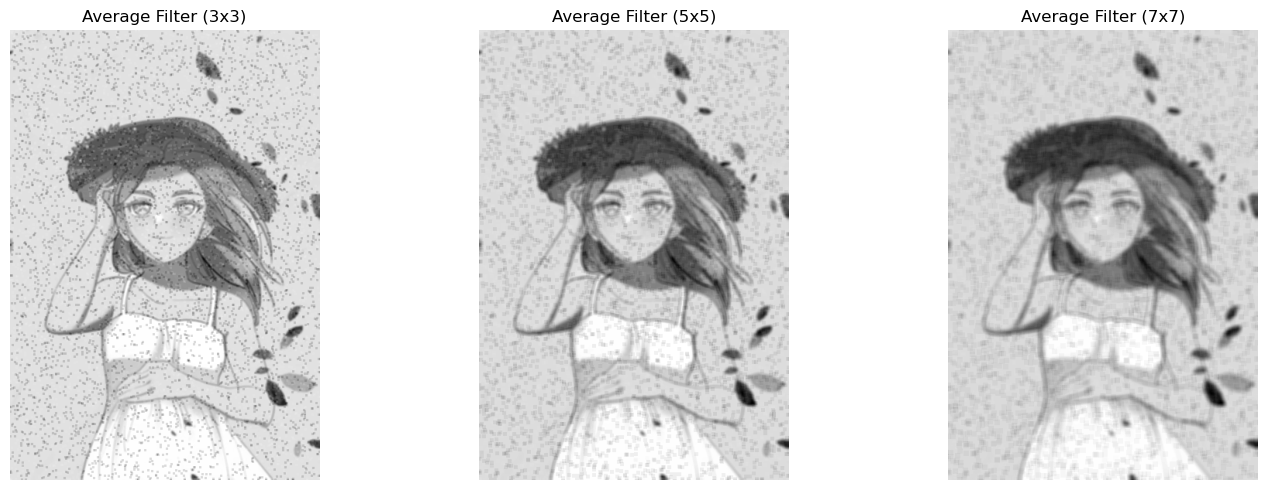

In [55]:
snp_avg3x3 = cv2.blur(snp_noisy_image,(3,3))
snp_avg5x5 = cv2.blur(snp_noisy_image,(5,5))
snp_avg7x7 = cv2.blur(snp_noisy_image,(7,7))

# Display the images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(snp_avg3x3, cmap='gray')
plt.axis('off')
plt.title("Average Filter (3x3)")
plt.subplot(1, 3, 2)
plt.imshow(snp_avg5x5, cmap='gray')
plt.axis('off')
plt.title("Average Filter (5x5)")
plt.subplot(1, 3, 3)
plt.imshow(snp_avg7x7, cmap='gray')
plt.axis('off')
plt.title("Average Filter (7x7)")
plt.tight_layout()
plt.show()

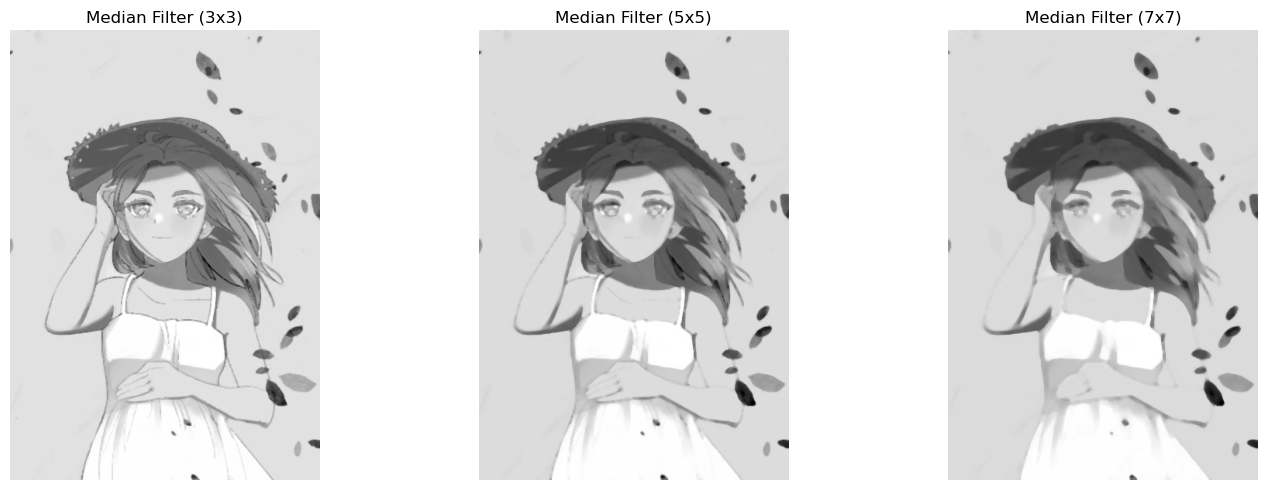

In [56]:
snp_median3x3 = cv2.medianBlur(snp_noisy_image,3)
snp_median5x5 = cv2.medianBlur(snp_noisy_image,5)
snp_median7x7 = cv2.medianBlur(snp_noisy_image,7)

# Display the images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(snp_median3x3, cmap='gray')
plt.axis('off')
plt.title("Median Filter (3x3)")
plt.subplot(1, 3, 2)
plt.imshow(snp_median5x5, cmap='gray')
plt.axis('off')
plt.title("Median Filter (5x5)")
plt.subplot(1, 3, 3)
plt.imshow(snp_median7x7, cmap='gray')
plt.axis('off')
plt.title("Median Filter (7x7)")
plt.tight_layout()
plt.show()

Median blurr worked better for salt and pepper noise. Median blur is a go-to for salt and pepper noise because it ditches extreme outliers without blurring the whole image. Unlike averaging filters that just soften everything, median filtering swaps noisy pixels with real neighboring values, keeping edges crisp. Since it’s non-linear, it handles impulse noise like a champ, even if multiple pixels in a small area are messed up. It specifically targets isolated noise while leaving clean regions untouched, making it way better than Gaussian blur, which struggles with salt and pepper noise.